### import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_absolute_error,mean_squared_error , r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Problem Statement 

In [ ]:
* About Dataset:
The data features are as follows:
The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower 
and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning.<b>
So if you want to learn how to train a car price prediction model<b>

* Features Information:
🚘Car_Name: Give the information of car Name.

📅Year: Give the information about Manufacturing year of car.

💸Selling_Price: Give the information about selling price.

💷Present_Price: Give the information about present price in showroom.

🚕Kms_Driven: Give the information about car driven in km.

🌫Fuel_Type: Give the information about which type of fuel is used Petrol ,Diesel or CNG.

🚙Seller_Type: Give the information about seller_type Dealer or Individual.

Transmission: Give the information about Transmission system whether is Manual or Automatic.

Owner: Number of previous owners of the car

☸️ Project target : Predict Used car price based on car specifications

_Data cleaning

_feature engineering

_Getting more insights

_Data Pre-processing

_modeling

_evalution

### Data Gathering 

In [2]:
df= pd.read_csv('car_data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
df = df.drop(['Car_Name','Year'],axis= 1)

### encoding On Ordinal and Nominal Data 

In [6]:
df['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [7]:
df['Selling_type'].replace({'Dealer':1,'Individual':0},inplace=True)

In [8]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [9]:
df['Transmission'].replace({'Manual':1,'Automatic':0},inplace=True)

In [10]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [11]:
df= pd.get_dummies(df ,dtype= int)
df

,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,27000,1,1,0,0,0,1
1,4.75,9.54,43000,1,1,0,0,1,0
2,7.25,9.85,6900,1,1,0,0,0,1
3,2.85,4.15,5200,1,1,0,0,0,1
4,4.60,6.87,42450,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,1,1,0,0,1,0
297,4.00,5.90,60000,1,1,0,0,0,1
298,3.35,11.00,87934,1,1,0,0,0,1
299,11.50,12.50,9000,1,1,0,0,1,0


In [12]:
x= df.drop('Selling_type',axis=1)
y = df['Selling_Price']

### train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Model Evaluation

In [14]:
dt_reg= DecisionTreeRegressor(random_state=0)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [15]:
dt_reg.score(x_train,y_train)

1.0

In [16]:
dt_reg.score(x_test,y_test)

0.9982339509832721

In [17]:
x_columns= x.columns
x_columns

Index(['Selling_Price', 'Present_Price', 'Driven_kms', 'Transmission', 'Owner',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

### Decision Tree Ploting 

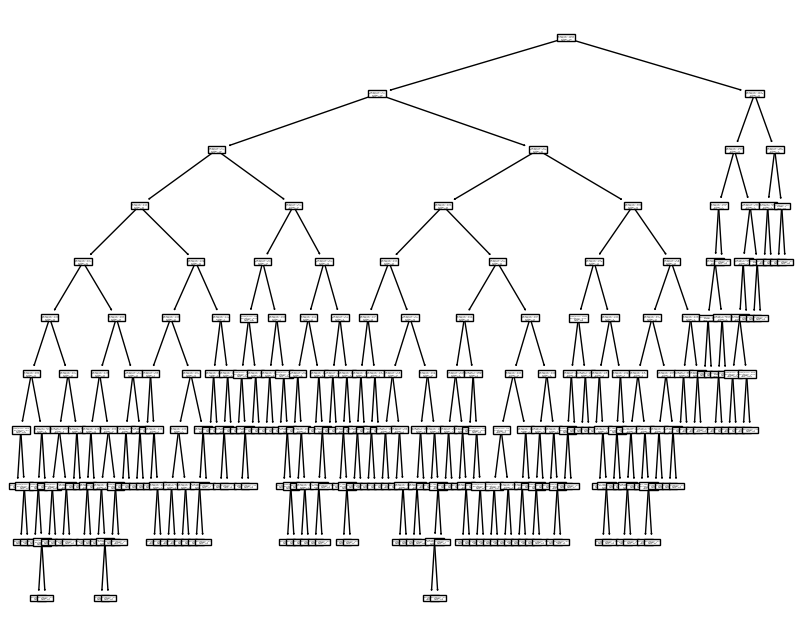

In [18]:
plt.figure(figsize=(10,8))
tree= plot_tree(dt_reg,feature_names=['Selling_Price', 'Present_Price', 'Driven_kms', 'Transmission', 'Owner',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'])
plt.savefig("DT_reg_car_data.png")

### Training Data evaluation

In [19]:
y_pred_train= dt_reg.predict(x_train)

In [20]:
mse= mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)
rmse= np.sqrt(mse)
print("RMSE:",rmse)
mae= mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)
r2_sc= r2_score(y_train,y_pred_train)
print("R_2:",r2_sc)

MSE: 1.2839532962581572e-34
RMSE: 1.1331166295920986e-17
MAE: 2.3129646346357427e-18
R_2: 1.0


### Testing Data Evaluation

In [21]:
y_pred= dt_reg.predict(x_test)

In [22]:
mse= mean_squared_error(y_test,y_pred)
print("MSE:",mse)
rmse= np.sqrt(mse)
print("RMSE:",rmse)
mae= mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
r2_sc= r2_score(y_test,y_pred)
print("R_2:",r2_sc)

MSE: 0.044640983606557424
RMSE: 0.21128413003952148
MAE: 0.0821311475409836
R_2: 0.9982339509832721


### Pruning

In [23]:
ccp_alpha_values= dt_reg.cost_complexity_pruning_path(x_train,y_train)['ccp_alphas']
ccp_alpha_values

array([0.00000000e+00, 5.55111512e-18, 5.55111512e-18, 7.40148683e-18,
       7.40148683e-18, 5.92118946e-17, 5.92118946e-17, 1.18423789e-16,
       1.18423789e-16, 1.18423789e-16, 1.48029737e-16, 2.36847579e-16,
       2.08333333e-07, 2.77777778e-07, 2.77777778e-07, 2.77777778e-07,
       3.12500000e-07, 6.25000000e-07, 8.33333333e-07, 1.33333333e-06,
       2.38095238e-06, 2.50000000e-06, 2.81250000e-06, 4.21875000e-06,
       4.44444444e-06, 5.20833333e-06, 5.20833333e-06, 5.20833333e-06,
       5.20833333e-06, 5.20833333e-06, 5.20833333e-06, 5.20833333e-06,
       5.20833333e-06, 5.20833333e-06, 5.20833333e-06, 5.20833333e-06,
       6.80555556e-06, 6.94444444e-06, 6.94444444e-06, 6.94444444e-06,
       6.94444444e-06, 6.94444444e-06, 6.94444444e-06, 6.94444444e-06,
       7.03125000e-06, 7.81250000e-06, 8.33333333e-06, 1.04166667e-05,
       1.25000000e-05, 1.38888889e-05, 1.48809524e-05, 1.56250000e-05,
       1.62037037e-05, 1.90138889e-05, 2.03174603e-05, 2.08333333e-05,
      

In [24]:
ccp_alpha_values= dt_reg.cost_complexity_pruning_path(x_train,y_train)['ccp_alphas']
ccp_alpha_values
train_acc_list,test_acc_list= [],[]
for ccp_alphas in ccp_alpha_values:
    dt_reg= DecisionTreeRegressor(ccp_alpha=ccp_alphas ,random_state=0 )
    dt_reg.fit(x_train,y_train)
    train_acc_list.append(dt_reg.score(x_train,y_train))
    test_acc_list.append(dt_reg.score(x_test,y_test))
    

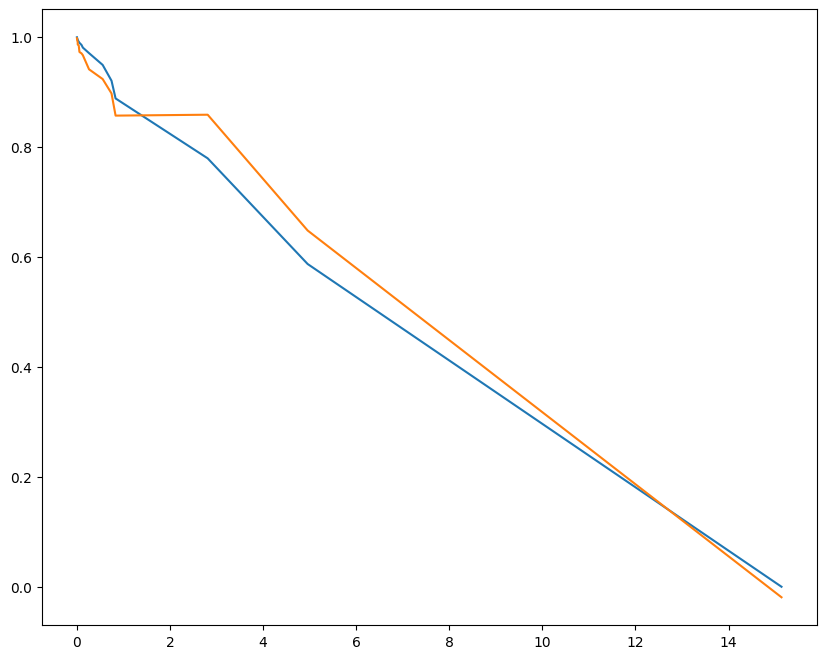

In [25]:

plt.figure(figsize=(10,8))
plt.plot(ccp_alpha_values,train_acc_list)
plt.plot(ccp_alpha_values,test_acc_list)

In [26]:
dt_reg_pruning= DecisionTreeRegressor(ccp_alpha=9.74743449e-02, random_state=0)
dt_reg_pruning.fit(x_train,y_train)
print("Training Accuracy:",dt_reg_pruning.score(x_train,y_train))
print("Testing Accuracy:",dt_reg_pruning.score(x_test,y_test))

Training Accuracy: 0.9861407886919633
Testing Accuracy: 0.9707112144574328


In [27]:
5.20833333e-06

5.20833333e-06

In [28]:
np.argmax(train_acc_list)

0

In [29]:
train_acc_list[0]

1.0